In [771]:
##import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 


# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [772]:
## Step 1: Reading and Understanding the Data
bikes = pd.read_csv("day.csv")
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [773]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [774]:
bikes.shape

(730, 16)

In [775]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [776]:
bikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [777]:
## Remove unnecessary columns, which are not needed ex: instant, dteday, casual and registered

bikeSharing = bikes.loc[:, ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]
bikeSharing.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [778]:
## Step 2: Visualising the Data

#Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables present to visualise which variables are most correlated to `Cnt`.

<Figure size 720x360 with 0 Axes>

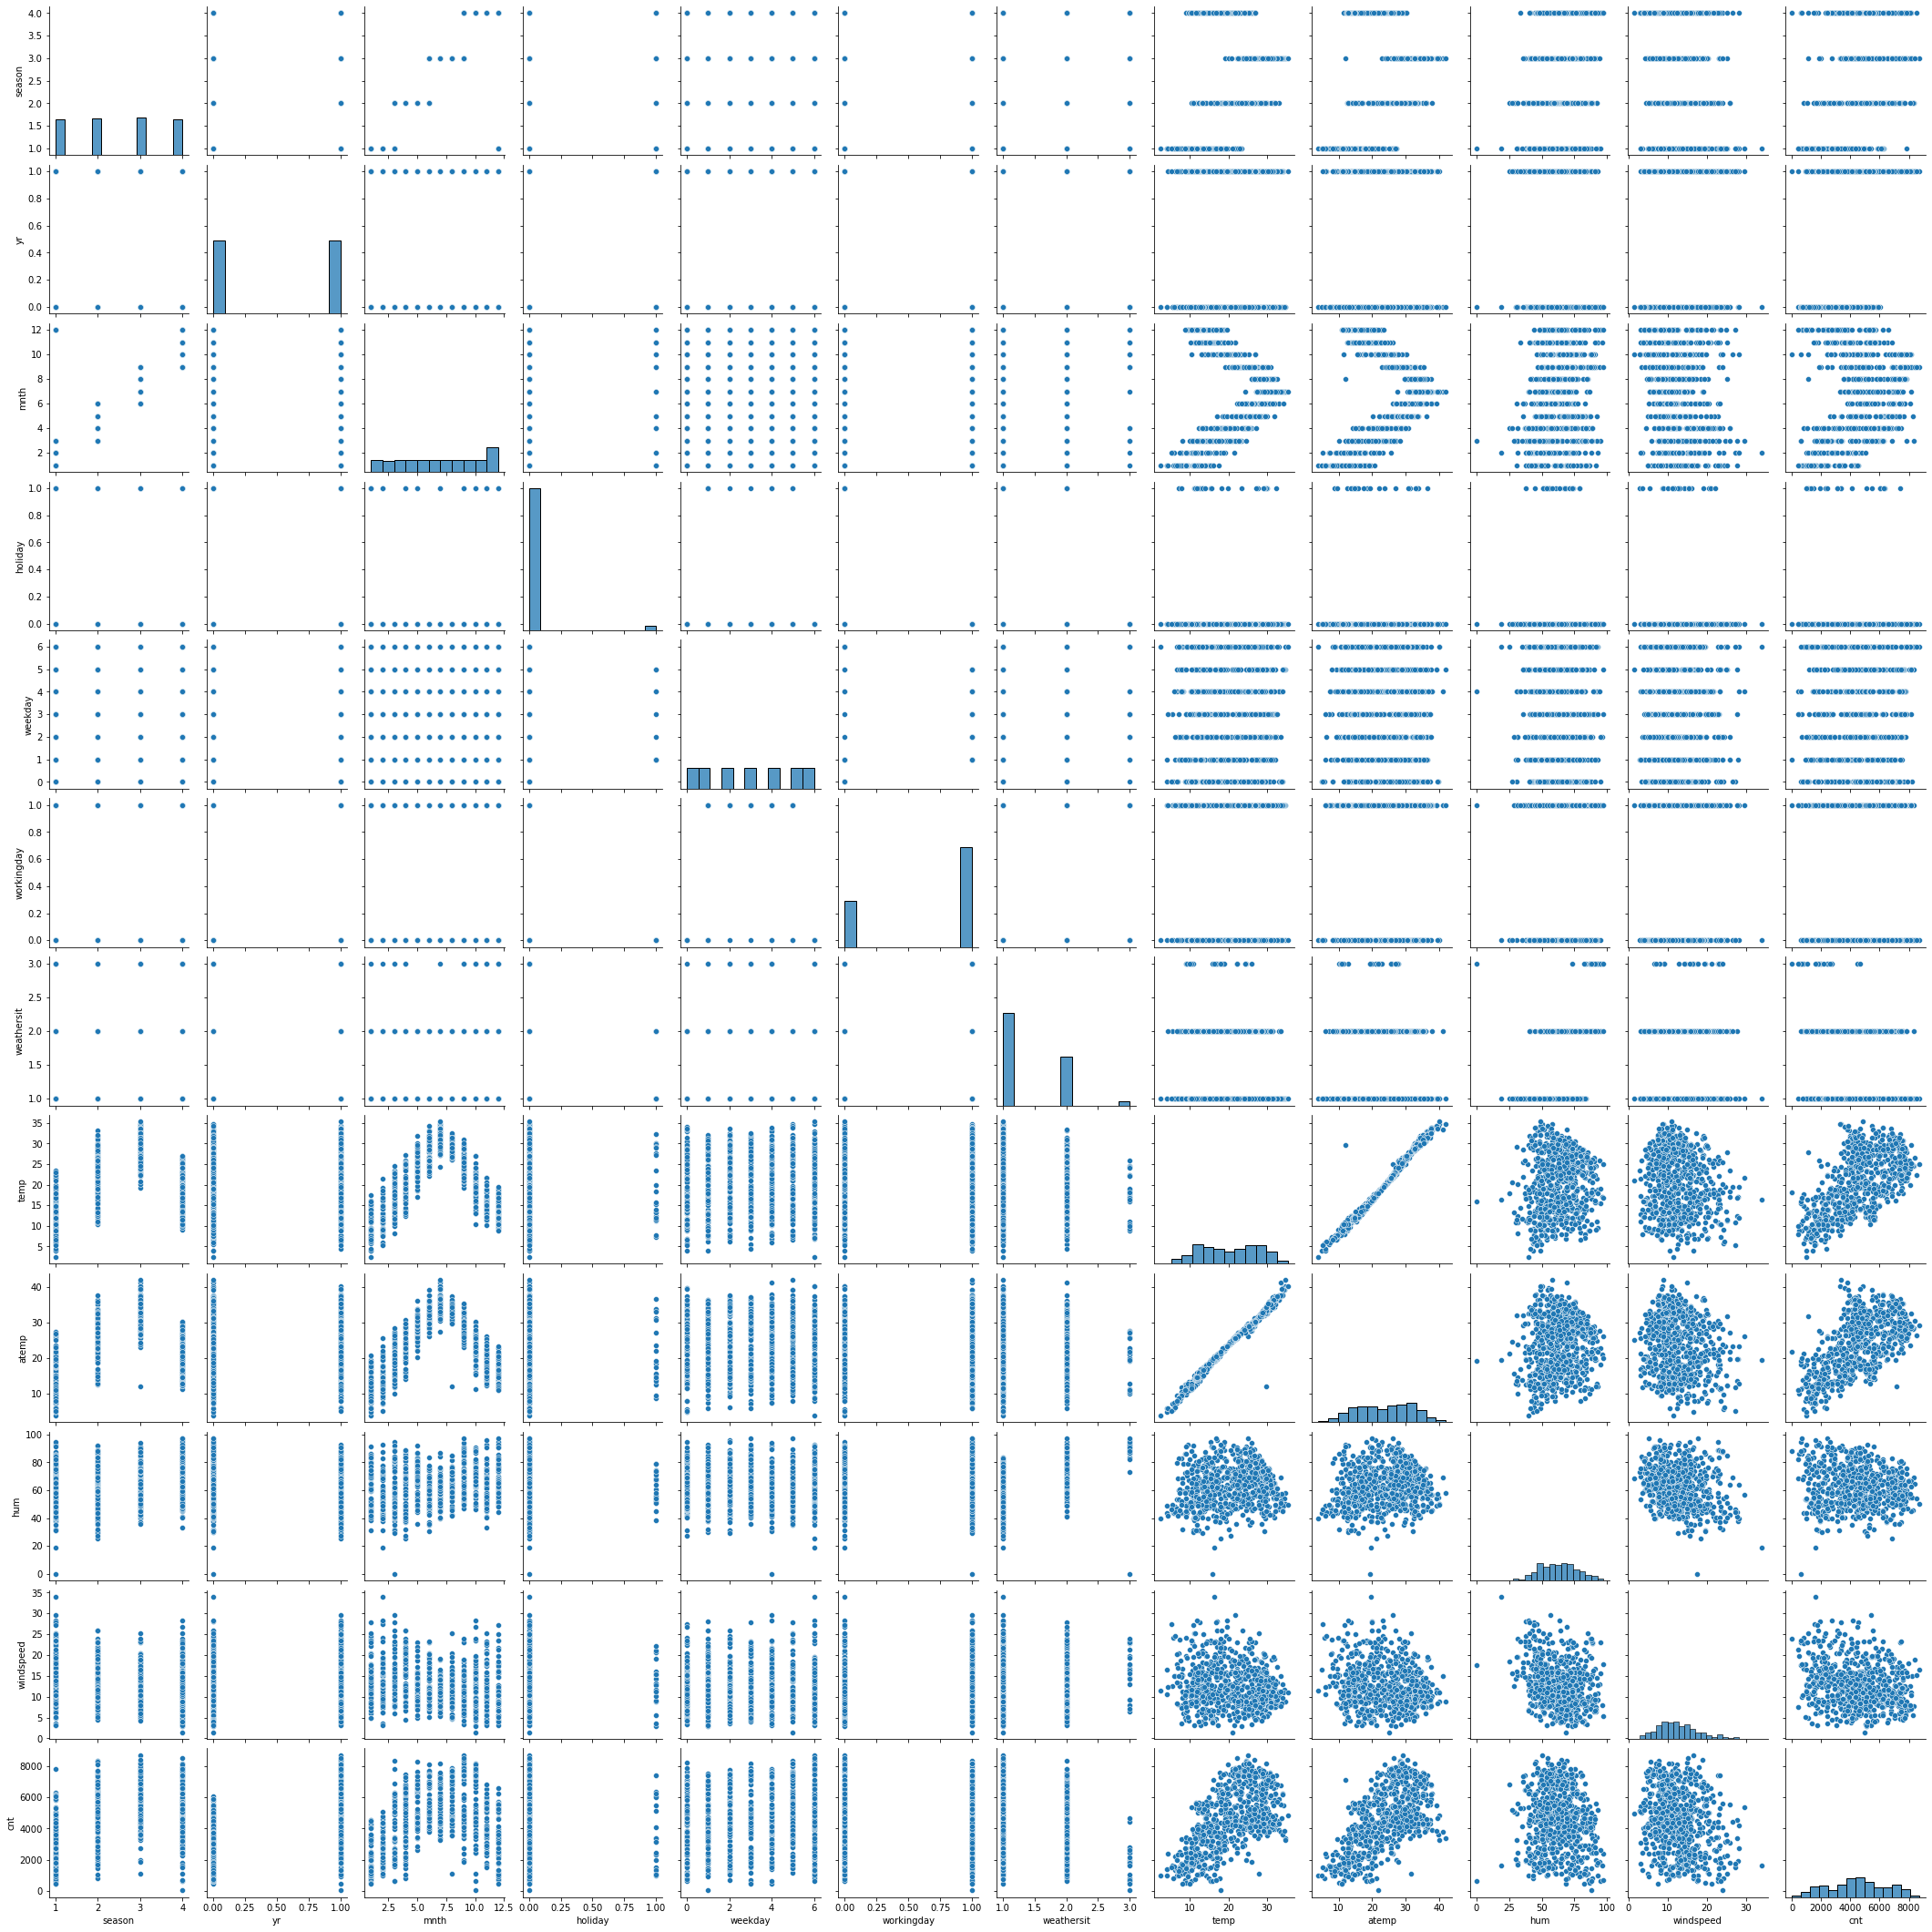

In [779]:
plt.figure(figsize = (10, 5))
sns.pairplot(bikeSharing)
plt.show()

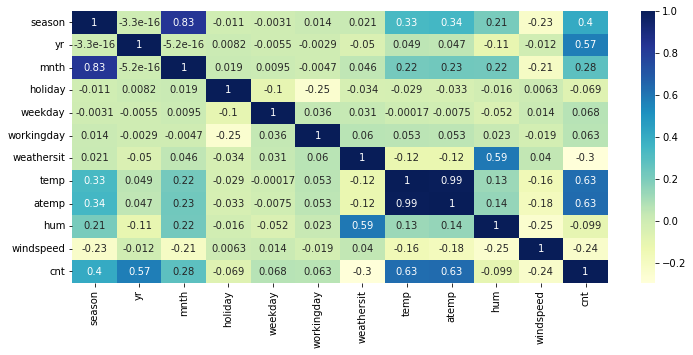

In [780]:
plt.figure(figsize = (12, 5))
sns.heatmap(bikeSharing.corr(), cmap="YlGnBu", annot = True)
plt.show()

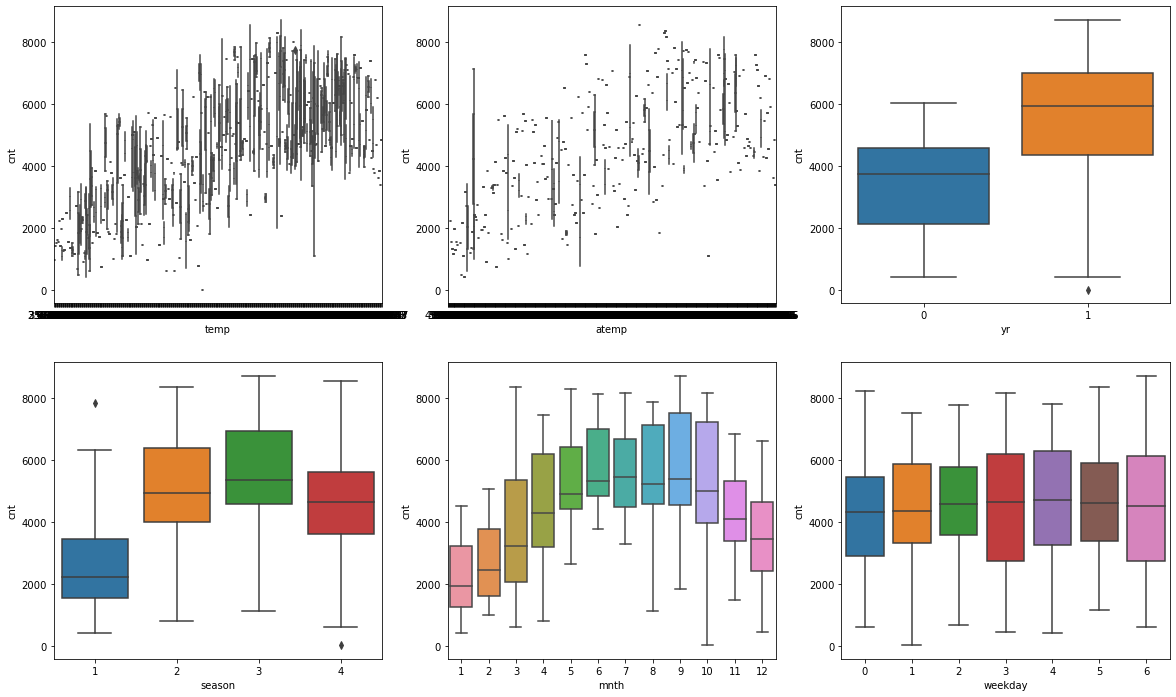

In [781]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'temp', y = 'cnt', data = bikeSharing)
plt.subplot(2,3,2)
sns.boxplot(x = 'atemp', y = 'cnt', data = bikeSharing)
plt.subplot(2,3,3)
sns.boxplot(x = 'yr', y = 'cnt', data = bikeSharing)
plt.subplot(2,3,4)
sns.boxplot(x = 'season', y = 'cnt', data = bikeSharing)
plt.subplot(2,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikeSharing)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikeSharing)
plt.show()

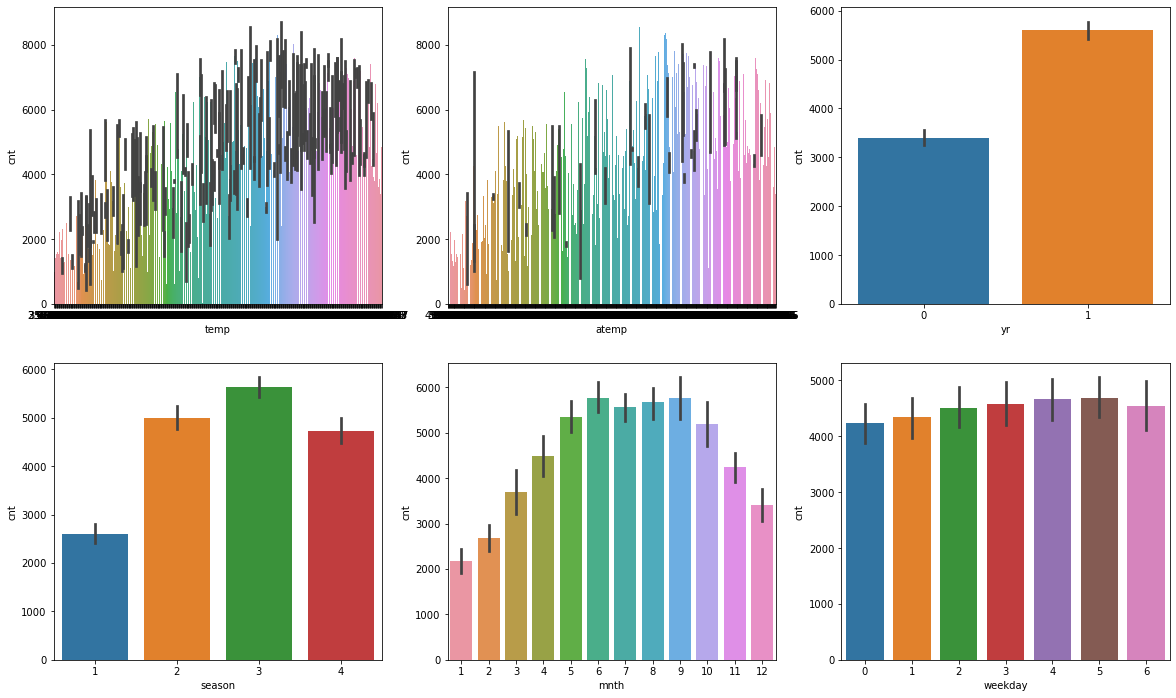

In [782]:
##Bar graph
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.barplot(x = 'temp', y = 'cnt', data = bikeSharing)
plt.subplot(2,3,2)
sns.barplot(x = 'atemp', y = 'cnt', data = bikeSharing)
plt.subplot(2,3,3)
sns.barplot(x = 'yr', y = 'cnt', data = bikeSharing)
plt.subplot(2,3,4)
sns.barplot(x = 'season', y = 'cnt', data = bikeSharing)
plt.subplot(2,3,5)
sns.barplot(x = 'mnth', y = 'cnt', data = bikeSharing)
plt.subplot(2,3,6)
sns.barplot(x = 'weekday', y = 'cnt', data = bikeSharing)
plt.show()

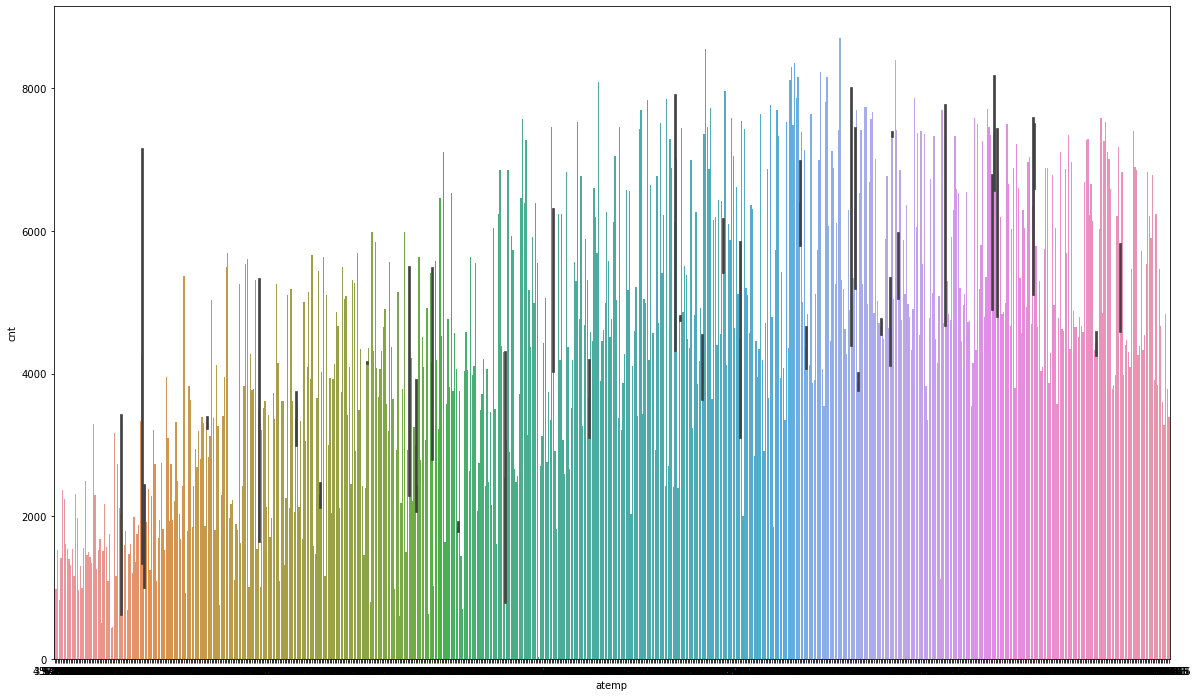

In [783]:
plt.figure(figsize=(20, 12))
sns.barplot(x = 'atemp', y = 'cnt', data = bikeSharing)
plt.show()

In [784]:
## Step3: Data Preparation

# identify categorical variables
cat_vars = ['season','yr','mnth','holiday','weekday', 'workingday','weathersit']

# convert dtype of categorical variables
bikeSharing[cat_vars] = bikeSharing[cat_vars].astype('category')
bikeSharing.describe()

,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


In [785]:
# # map the season column according to descripttions
bikeSharing['season'] = bikeSharing['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [786]:
# # map the weekday column according to descriptin
bikeSharing['weekday'] = bikeSharing['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})
bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Sat,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sun,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Mon,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tue,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wed,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [787]:
# map mnth column values (1 to 12 ) as (jan to dec) respectively
bikeSharing['mnth'] = bikeSharing['mnth'].map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct',
                             11: 'nov', 12:'dec'})

#   map weathersit column
bikeSharing['weathersit'] = bikeSharing['weathersit'].map({1: 'Clear_FewClouds', 2: 'Mist_Cloudy', 3: 'LightSnow_LightRain', 4: 'HeavyRain_IcePallets'})

bikeSharing.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,Sat,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,Sun,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,Mon,1,Clear_FewClouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,Tue,1,Clear_FewClouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,Wed,1,Clear_FewClouds,9.305237,11.46350,43.6957,12.522300,1600


In [788]:
#Create dummy variables
dummy_vars = pd.get_dummies(bikeSharing[['season','weekday','mnth','weathersit']],drop_first=False)
dummy_vars

,season_spring,season_summer,season_fall,season_winter,weekday_Sun,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,...,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec,weathersit_Clear_FewClouds,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
726,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
727,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [789]:
bikeSharing = pd.concat([bikeSharing,dummy_vars], axis = 1)
bikeSharing.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec,weathersit_Clear_FewClouds,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
0,spring,0,jan,0,Sat,0,Mist_Cloudy,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,0,1,0
1,spring,0,jan,0,Sun,0,Mist_Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,1,0
2,spring,0,jan,0,Mon,1,Clear_FewClouds,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,Tue,1,Clear_FewClouds,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,jan,0,Wed,1,Clear_FewClouds,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [790]:
bikeSharing.drop(['season','weekday','mnth','weathersit'], axis=1, inplace=True)
bikeSharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec,weathersit_Clear_FewClouds,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [791]:
#Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikeSharing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [792]:
df_train.shape

(510, 34)

In [793]:
df_test.shape

(219, 34)

In [794]:
##Rescaling the Features
from sklearn.preprocessing import MinMaxScaler

In [795]:
scaler = MinMaxScaler()
df_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec,weathersit_Clear_FewClouds,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
653,1,0,1,19.201653,23.04230,55.8333,12.208807,7534,0,0,...,0,0,0,0,1,0,0,1,0,0
576,1,0,1,29.246653,33.14480,70.4167,11.083475,7216,0,0,...,0,1,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,20.67460,62.1250,10.792293,4066,1,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,0,10.489153,11.58500,48.3333,23.500518,1796,1,0,...,0,0,0,0,0,0,1,1,0,0
482,1,0,0,15.443347,18.87520,48.9583,8.708325,4220,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,32.98605,58.7917,13.916771,6664,0,1,...,1,0,0,0,0,0,0,0,1,0
578,1,0,1,30.852500,35.35440,65.9583,8.666718,7261,0,0,...,0,0,1,0,0,0,0,1,0,0
53,0,0,1,9.091299,12.28585,42.3043,6.305571,1917,1,0,...,0,0,0,0,0,0,0,1,0,0
350,0,0,0,10.591653,12.46855,56.0833,16.292189,2739,0,0,...,0,0,0,0,0,0,1,0,1,0


In [796]:
# Apply scaler() to all columns except bool and dummy columns
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


In [797]:
df_train.head

<bound method NDFrame.head of     yr holiday workingday      temp     atemp       hum  windspeed       cnt  \
653  1       0          1  0.509887  0.501133  0.575354   0.300794  0.864243   
576  1       0          1  0.815169  0.766351  0.725633   0.264686  0.827658   
426  1       0          0  0.442393  0.438975  0.640189   0.255342  0.465255   
728  1       0          0  0.245101  0.200348  0.498067   0.663106  0.204096   
482  1       0          0  0.395666  0.391735  0.504508   0.188475  0.482973   
..  ..     ...        ...       ...       ...       ...        ...       ...   
526  1       0          1  0.824514  0.762183  0.605840   0.355596  0.764151   
578  1       0          1  0.863973  0.824359  0.679690   0.187140  0.832835   
53   0       0          1  0.202618  0.218747  0.435939   0.111379  0.218017   
350  0       0          0  0.248216  0.223544  0.577930   0.431816  0.312586   
79   0       0          1  0.462664  0.434043  0.759870   0.529881  0.236424   

     seas

In [798]:
df_train.describe

<bound method NDFrame.describe of     yr holiday workingday      temp     atemp       hum  windspeed       cnt  \
653  1       0          1  0.509887  0.501133  0.575354   0.300794  0.864243   
576  1       0          1  0.815169  0.766351  0.725633   0.264686  0.827658   
426  1       0          0  0.442393  0.438975  0.640189   0.255342  0.465255   
728  1       0          0  0.245101  0.200348  0.498067   0.663106  0.204096   
482  1       0          0  0.395666  0.391735  0.504508   0.188475  0.482973   
..  ..     ...        ...       ...       ...       ...        ...       ...   
526  1       0          1  0.824514  0.762183  0.605840   0.355596  0.764151   
578  1       0          1  0.863973  0.824359  0.679690   0.187140  0.832835   
53   0       0          1  0.202618  0.218747  0.435939   0.111379  0.218017   
350  0       0          0  0.248216  0.223544  0.577930   0.431816  0.312586   
79   0       0          1  0.462664  0.434043  0.759870   0.529881  0.236424   

     

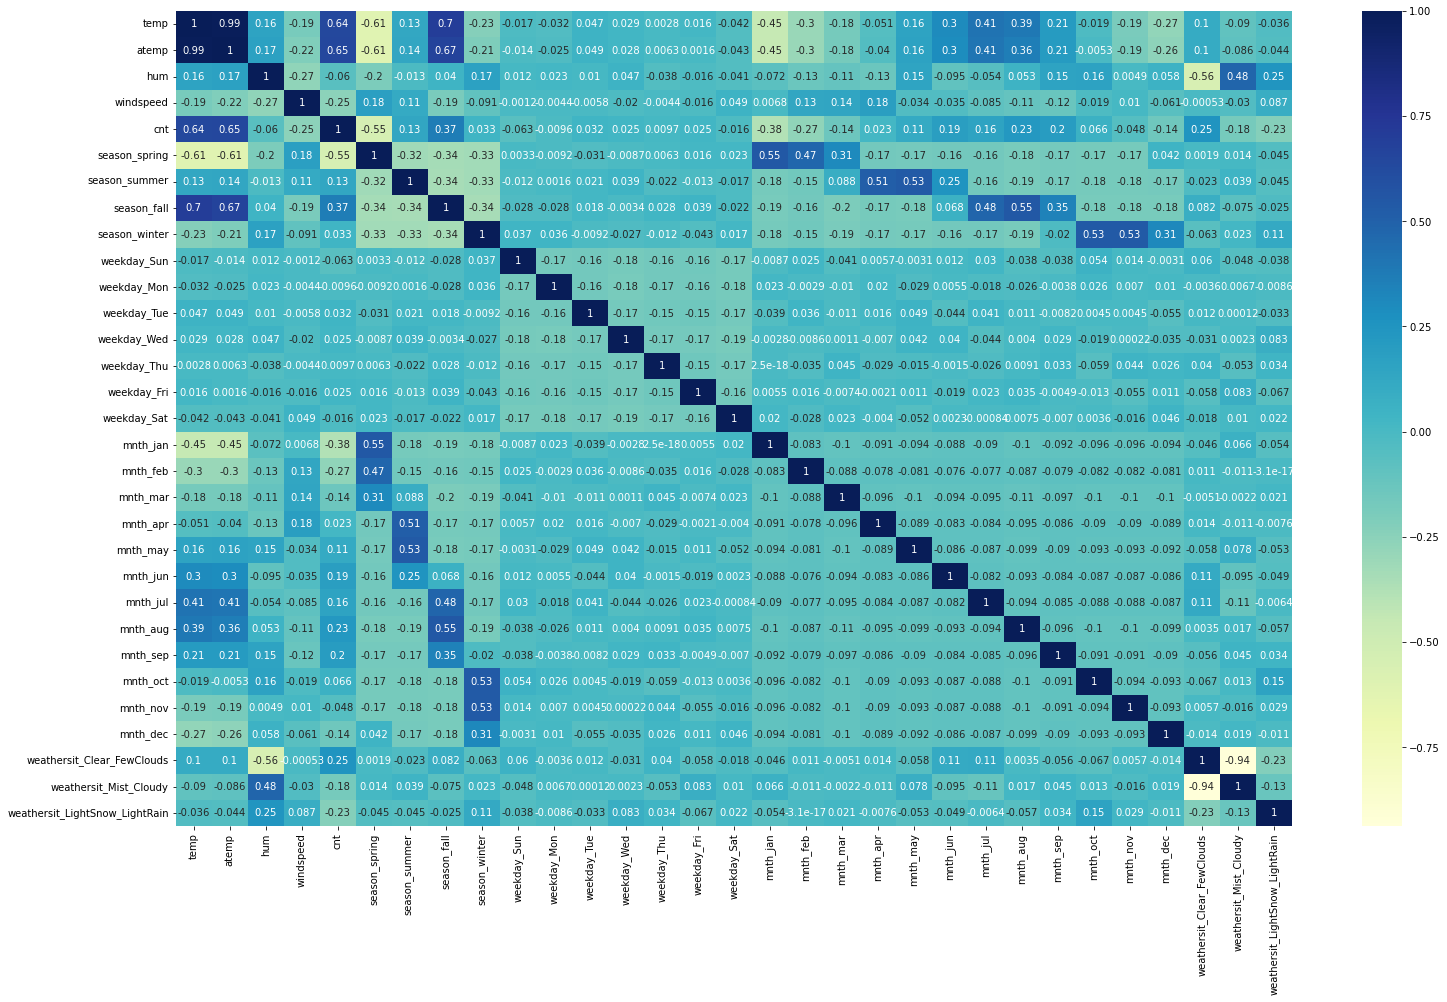

In [799]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

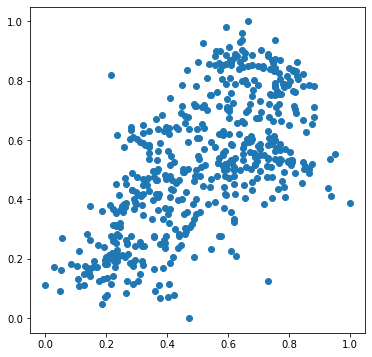

In [800]:
##cnt is more corelated with atemp.
# lets draw a pair plot for cnt vs atemp

plt.figure(figsize=[6,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

In [801]:
### Dividing into X and Y sets for the model building

In [802]:
y_train = df_train.pop('cnt')
X_train = df_train

In [803]:
## Step 5: Building a linear model

import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['atemp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [804]:
lr.params

const    0.162924
atemp    0.683633
dtype: float64

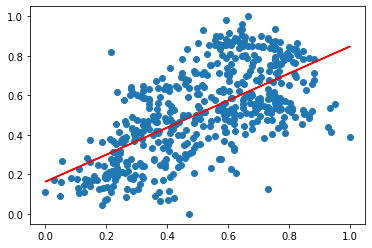

In [805]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.163 + 0.684*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [806]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Wed, 16 Mar 2022   Prob (F-statistic):           1.10e-61
Time:                        21:22:42   Log-Likelihood:                 176.51
No. Observations:                 510   AIC:                            -349.0
Df Residuals:                     508   BIC:                            -340.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1629      0.020      8.199      0.0

In [807]:
### Adding another variable

#The R-squared value obtained is `0.418`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. `temp`.


In [808]:
# Assign all the feature variables to X
X_train_lm = X_train[['atemp', 'temp']]

In [809]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr1 = sm.OLS(y_train, X_train_lm).fit()

lr1.params

const    0.163383
atemp    0.492316
temp     0.181818
dtype: float64

In [810]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Wed, 16 Mar 2022   Prob (F-statistic):           1.10e-61
Time:                        21:22:42   Log-Likelihood:                 176.51
No. Observations:                 510   AIC:                            -349.0
Df Residuals:                     508   BIC:                            -340.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1629      0.020      8.199      0.0

In [811]:
#there is a slight improvement inn R Square from 0.418 to 0.419

In [812]:
#lets add all variables to the model
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

lr_2.params

const                             0.108930
yr                                0.232208
holiday                          -0.031370
workingday                        0.054903
temp                              0.401322
atemp                             0.050628
hum                              -0.151812
windspeed                        -0.184388
season_spring                    -0.045103
season_summer                     0.041693
season_fall                       0.003477
season_winter                     0.108864
weekday_Sun                       0.015433
weekday_Mon                      -0.005537
weekday_Tue                      -0.003343
weekday_Wed                       0.010232
weekday_Thu                       0.006215
weekday_Fri                       0.015965
weekday_Sat                       0.069965
mnth_jan                         -0.045861
mnth_feb                         -0.015472
mnth_mar                          0.017992
mnth_apr                          0.016704
mnth_may   

In [813]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          8.42e-181
Time:                        21:22:42   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [814]:
# we can drop the some of the variables with high Pvalue, which is not significant
# check the VIF

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [815]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,weekday_Fri,inf
17,weekday_Sat,inf
31,weathersit_Mist_Cloudy,inf
30,weathersit_Clear_FewClouds,inf
29,mnth_dec,inf
28,mnth_nov,inf
27,mnth_oct,inf
26,mnth_sep,inf
25,mnth_aug,inf
24,mnth_jul,inf


In [816]:
# Dropping highly correlated variables and insignificant variables
X = X_train.drop(["season_fall"], 1)

In [817]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          8.42e-181
Time:                        21:22:42   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [818]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,weekday_Sat,inf
1,holiday,inf
30,weathersit_Mist_Cloudy,inf
29,weathersit_Clear_FewClouds,inf
28,mnth_dec,inf
27,mnth_nov,inf
26,mnth_oct,inf
25,mnth_sep,inf
24,mnth_aug,inf
23,mnth_jul,inf


In [819]:
X = X.drop(["weekday_Tue"], 1)

In [820]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_4.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          8.42e-181
Time:                        21:22:42   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [821]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
15,weekday_Sat,inf
16,mnth_jan,inf
29,weathersit_Mist_Cloudy,inf
28,weathersit_Clear_FewClouds,inf
27,mnth_dec,inf
26,mnth_nov,inf
25,mnth_oct,inf
24,mnth_sep,inf
23,mnth_aug,inf
22,mnth_jul,inf


In [822]:
X = X.drop(["weekday_Mon"], 1)


# Build a fifth fitted model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_5.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.9
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          8.26e-182
Time:                        21:22:42   Log-Likelihood:                 528.01
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     482   BIC:                            -881.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [823]:
X = X.drop(["mnth_feb"], 1)


# Build a sixth fitted model
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_6.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.9
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          8.26e-182
Time:                        21:22:42   Log-Likelihood:                 528.01
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     482   BIC:                            -881.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [824]:
X = X.drop(["mnth_nov"], 1)


# Build a seventh fitted model
X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_7.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          8.20e-183
Time:                        21:22:42   Log-Likelihood:                 527.97
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     483   BIC:                            -887.6
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [825]:

X = X.drop(["mnth_jul"], 1)


# Build a eightth fitted model
X_train_lm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_8.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     112.6
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          7.65e-184
Time:                        21:22:42   Log-Likelihood:                 527.97
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     484   BIC:                            -893.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [826]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
26,weathersit_LightSnow_LightRain,inf
24,weathersit_Clear_FewClouds,inf
2,workingday,inf
14,weekday_Sat,inf
25,weathersit_Mist_Cloudy,inf
1,holiday,inf
10,weekday_Sun,inf
3,temp,62.92
4,atemp,55.75
8,season_summer,7.18


In [827]:
X = X.drop(["mnth_dec"], 1)


# Build a nineth fitted model
X_train_lm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_9.summary())



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     117.5
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          7.64e-185
Time:                        21:22:42   Log-Likelihood:                 527.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     485   BIC:                            -899.9
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [828]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
25,weathersit_LightSnow_LightRain,inf
24,weathersit_Mist_Cloudy,inf
14,weekday_Sat,inf
1,holiday,inf
23,weathersit_Clear_FewClouds,inf
10,weekday_Sun,inf
2,workingday,inf
3,temp,62.60
4,atemp,55.73
8,season_summer,7.18


In [829]:

X = X.drop(["weekday_Sun"], 1)


# Build a tenth fitted model
X_train_lm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_10.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     117.5
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          7.64e-185
Time:                        21:22:42   Log-Likelihood:                 527.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     485   BIC:                            -899.9
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [830]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
3,temp,62.60
22,weathersit_Clear_FewClouds,58.90
4,atemp,55.73
23,weathersit_Mist_Cloudy,38.29
8,season_summer,7.18
7,season_spring,6.56
9,season_winter,5.16
24,weathersit_LightSnow_LightRain,4.69
17,mnth_may,3.50
16,mnth_apr,3.20


In [831]:
## Residual Analysis of the train data
y_train_count = lr_10.predict(X_train_lm)

Text(0.5, 0, 'Errors')

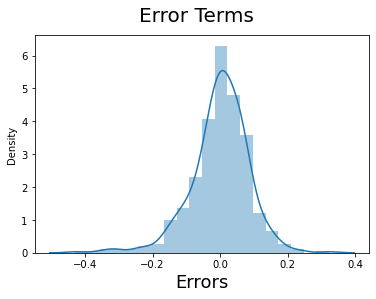

In [832]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [833]:
## Making Predictions Using the Final Model

# apply scaling on test data

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.describe()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_fall,season_winter,weekday_Sun,...,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec,weathersit_Clear_FewClouds,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.246575,0.232877,0.146119,...,0.095890,0.105023,0.059361,0.086758,0.082192,0.073059,0.086758,0.652968,0.319635,0.027397
std,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.432005,0.423633,0.354034,...,0.295115,0.307285,0.236840,0.282125,0.275286,0.260830,0.282125,0.477117,0.467403,0.163612
min,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [834]:
y_test = df_test.pop('cnt')
X_test = df_test

In [835]:
# Adding constant variable to test dataframe
X_test_m1 = sm.add_constant(X_test)
X_test_m1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   const                           219 non-null    float64 
 1   yr                              219 non-null    category
 2   holiday                         219 non-null    category
 3   workingday                      219 non-null    category
 4   temp                            219 non-null    float64 
 5   atemp                           219 non-null    float64 
 6   hum                             219 non-null    float64 
 7   windspeed                       219 non-null    float64 
 8   season_spring                   219 non-null    uint8   
 9   season_summer                   219 non-null    uint8   
 10  season_fall                     219 non-null    uint8   
 11  season_winter                   219 non-null    uint8   
 12  weekday_Sun          

In [836]:
X_test_m2 = X_test_m1.drop(["season_fall", "weekday_Sun", "weekday_Mon", "weekday_Tue", "mnth_feb", "mnth_jul", "mnth_nov", "mnth_dec"], axis = 1)

In [837]:
y_pred_m2 = lr_10.predict(X_test_m2)

Text(0, 0.5, 'y_pred')

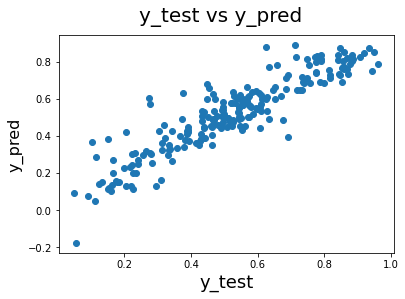

In [838]:
## Model Evaluation

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m2)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [839]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m2)


0.8273247561550116